In [484]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from skimage.util import img_as_ubyte

In [485]:
# To Modify if needed other data set
# normal = 0.0, ball = 1.0, out_race = 2.0, inner_race = 3.0
torque_type = '3hp'
fault_type = 'inner_race'
rpm = '1796'
type_value = 3.0
bearing_type = True # True -> DE bearing, False -> FE Bearing

In [486]:
file_name = torque_type + '_' + fault_type + '_' + rpm + '.csv'

In [487]:
data_set = pd.read_csv('data_set_48k_csv/' + file_name).values

In [488]:
data_set = data_set[:, 0] if bearing_type else data_set[:, -1]

In [489]:
# Devide all Data set into 400 lines representing a section
# For each section generate image and save image
data_set.size
data_set = data_set[:(data_set.size // 400) * 400]

In [490]:
data_set_split = np.array_split(data_set, data_set.size // 400)

In [491]:
data_set_split[0].shape

(400,)

In [492]:
scaller = MinMaxScaler(feature_range=(0, 1)) # feature_range=(0, 1) might do with that
data_set_split = scaller.fit_transform(data_set_split[:])

In [493]:
images = []
len(data_set_split[0])

400

In [494]:
# P[i,j] = A[(i - 1) * M + j]
# M = 20 N = 20
M = 20
N = 20
for element in range(0, len(data_set_split)):
    image_array = np.zeros((20, 20))
    matrix_to_transform = data_set_split[element]
    for i in range(1, 21):
        for j in range(1, 21):
            image_array[i - 1, j - 1] = matrix_to_transform[((i - 1) * M + j) - 1]
    images.append(image_array)

In [495]:
len(images)

1214

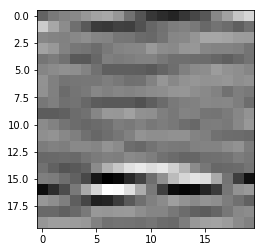

In [501]:
plt.imshow(images[73], cmap='gray')

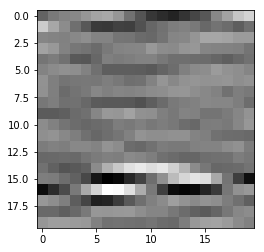

In [502]:
new_image = img_as_ubyte(images[73])
plt.imshow(new_image, cmap='gray')

In [503]:
images[73]

array([[0.4164276 , 0.49691403, 0.53799921, 0.55812547, 0.60976336,
        0.6568511 , 0.67286567, 0.60954673, 0.47413863, 0.36196029,
        0.25388486, 0.21251391, 0.18017255, 0.24806325, 0.31147541,
        0.37314945, 0.55114526, 0.64924185, 0.78013493, 0.84063647],
       [0.80363886, 0.66996837, 0.56961619, 0.46303901, 0.37782215,
        0.26838951, 0.25745883, 0.29011117, 0.28237708, 0.35342698,
        0.42607884, 0.47321429, 0.51244589, 0.52745978, 0.50170887,
        0.43575322, 0.47709346, 0.45135178, 0.4005593 , 0.46293932],
       [0.55054891, 0.53819112, 0.52785493, 0.55610026, 0.57597447,
        0.54237012, 0.53582368, 0.48587614, 0.48314426, 0.44590546,
        0.43390578, 0.4765039 , 0.54670896, 0.55403101, 0.60314375,
        0.66793399, 0.66674448, 0.65573279, 0.62851406, 0.62702123],
       [0.6528011 , 0.61402751, 0.53225452, 0.48973895, 0.48008242,
        0.44867787, 0.49798467, 0.5379471 , 0.54561986, 0.54892581,
        0.61616604, 0.56852009, 0.55900725, 0

In [429]:
for i in range(0, len(images)):
    images[i] = new_scaller.fit_transform(images[i]).astype(int)

In [430]:
labels = np.ones((len(images), 1))
labels[:] = type_value
images = np.array(images)
final_images = []
images[0, :, :].flatten().shape
len(images)

1214

In [431]:
for image in range(0, len(images)):
    processed_image = images[image, :, :].flatten()
    final_images.append(processed_image)

In [432]:
final_images = np.array(final_images)
final_images.shape

(1214, 400)

In [433]:
final_data = np.hstack((final_images, labels))

In [434]:
data_set = pd.DataFrame(final_data, columns=None)

In [435]:
data_set

0      1      2      3      4      5      6      7      8      9    \
0     224.0  213.0  196.0  177.0  188.0  173.0  121.0  118.0  105.0  105.0   
1     123.0   81.0   35.0    0.0    0.0   38.0  113.0  179.0  171.0  246.0   
2     255.0  248.0  217.0  168.0  137.0  127.0  153.0  142.0  126.0  128.0   
3     112.0   96.0  111.0   96.0   52.0   20.0    0.0   58.0   92.0  155.0   
4     255.0  213.0  163.0  121.0  130.0  151.0  149.0  182.0  218.0  244.0   
5     117.0  195.0  220.0  210.0  244.0  212.0  144.0  132.0   67.0    0.0   
6      68.0  104.0   98.0   55.0   34.0   58.0   69.0   88.0   92.0  171.0   
7     133.0  128.0  101.0  105.0  130.0  140.0  137.0  172.0  126.0  105.0   
8      91.0  150.0  200.0  155.0  164.0  210.0  236.0  242.0  220.0  200.0   
9      35.0   36.0    1.0    0.0    0.0    0.0    0.0   75.0   84.0  162.0   
10    128.0  143.0  138.0  115.0  104.0  114.0  129.0  155.0  120.0   98.0   
11      0.0  124.0  244.0  255.0  255.0  255.0  254.0  195.0    0.0    0.0   
12    229.0  212.0  201.0  158.0  138.0  118.0  133.0  177.0  177.0  129.0   
13     70.0  105.0  177.0  150.0  197.0  177.0  205.0  193.0  155.0  132.0   
14    194.0  217.0  237.0  196.0  167.0  197.0  214.0  210.0  162.0  159.0   
15    116.0  140.0  164.0  143.0  152.0  149.0  193.0  255.0  255.0  248.0   
16     90.0  113.0  139.0  151.0  193.0  207.0  255.0  253.0  215.0  222.0   
17    110.0  122.0  134.0  122.0   91.0   82.0   85.0  148.0  198.0  254.0   
18     99.0   70.0   22.0    0.0    0.0    0.0   26.0  106.0  137.0  209.0   
19     85.0   85.0   98.0   80.0  101.0  156.0  161.0  175.0  154.0  120.0   
20    182.0  254.0  255.0  255.0  235.0  185.0  157.0  163.0  124.0  102.0   
21    158.0  148.0  116.0   92.0  132.0  140.0  206.0  254.0  210.0  156.0   
22    219.0  255.0  255.0  231.0  174.0  133.0   62.0   70.0   74.0   66.0   
23     68.0   80.0  119.0  120.0  133.0  129.0  176.0  213.0  250.0  255.0   
24    167.0  181.0  193.0  159.0  140.0  155.0  148.0  204.0  150.0  161.0   
25      0.0   64.0  213.0  255.0  255.0  253.0  254.0  233.0  235.0  194.0   
26    203.0  217.0  201.0  151.0  145.0  150.0  137.0  147.0  133.0  194.0   
27    206.0  200.0  184.0  172.0  164.0  155.0  137.0  139.0  171.0  177.0   
28    255.0  255.0  255.0  255.0  254.0  206.0  143.0  125.0  124.0  125.0   
29    193.0  127.0   80.0   54.0   50.0   41.0   31.0   97.0  107.0  135.0   
...     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
1184  142.0  232.0  251.0  184.0  162.0  157.0  166.0  190.0  200.0  200.0   
1185   58.0   41.0   46.0   49.0   87.0  122.0  168.0  189.0  199.0  211.0   
1186  139.0  169.0  190.0  171.0  234.0  244.0  246.0  242.0  255.0  222.0   
1187   93.0  110.0  126.0  104.0   88.0  114.0  185.0  178.0  158.0  164.0   
1188   80.0  138.0  173.0  158.0  136.0  159.0  211.0  223.0  200.0  208.0   
1189   86.0   26.0    0.0   17.0   71.0  186.0  249.0  255.0  255.0  255.0   
1190  190.0  208.0  207.0   55.0   45.0   40.0    9.0   24.0   36.0   67.0   
1191   25.0   72.0  127.0  106.0  103.0  117.0  111.0   91.0  137.0  159.0   
1192  130.0  150.0  162.0  166.0  147.0   90.0   84.0   96.0   70.0  110.0   
1193  211.0  220.0  187.0  126.0   87.0   79.0   78.0  109.0   85.0   57.0   
1194   42.0   37.0   66.0   88.0  135.0  132.0  176.0  202.0  199.0  196.0   
1195   84.0  107.0  127.0  103.0   90.0   65.0   33.0   60.0   69.0  109.0   
1196   28.0  177.0  255.0  255.0  255.0  255.0  238.0  166.0   81.0   12.0   
1197  169.0  145.0   85.0   67.0   78.0  116.0  149.0  154.0  131.0  134.0   
1198  105.0  137.0  139.0   85.0   74.0    5.0   26.0   75.0  117.0  170.0   
1199   77.0  114.0  113.0   99.0   97.0   99.0   76.0  121.0  128.0  153.0   
1200  158.0  178.0  172.0  161.0  157.0  142.0  156.0  189.0  143.0  174.0   
1201  188.0  181.0  181.0  152.0  171.0  142.0  108.0  107.0   98.0  110.0   
1202   81.0  119.0  153.0  163.0  205.0  219.0  214.0  255.0  217.0  189.0   
1203    0.0    0.0    0.0    0

In [436]:
bearing_type = 'DE' if bearing_type else 'FE'
file_name = torque_type + '_' + fault_type + '_' + rpm + '_' + bearing_type + '_img.csv'

In [437]:
data_set.to_csv('data_set_48k_scaled_csv_img/' + file_name, index=False)